In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
# Load the dataset
df = pd.read_csv('camel-1.6.csv')

# Convert 'bug' to a binary target: 1 if bug > 0, else 0.
# This assumes any number of bugs means a 'faulty' class, and 0 bugs means 'not faulty'.
df['is_faulty'] = df['bug'].apply(lambda x: 1 if x > 0 else 0)

# Define features (X) and target (y)
features = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm',
            'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc',
            'max_cc', 'avg_cc']
X = df[features]
y = df['is_faulty']

print("--- First 5 rows of the dataset with new target 'is_faulty' ---")
print(df.head())
print("\n--- Distribution of 'is_faulty' (binary target) column ---")
print(df['is_faulty'].value_counts())
print(f"Percentage of faulty classes: {df['is_faulty'].value_counts(normalize=True)[1]:.2%}")

--- First 5 rows of the dataset with new target 'is_faulty' ---
    name  version                                             name.1  wmc  \
0  camel      1.6        org.apache.camel.component.cxf.CxfComponent    5   
1  camel      1.6     org.apache.camel.impl.DefaultExchangeFormatter    4   
2  camel      1.6  org.apache.camel.component.jetty.JettyHttpComp...   20   
3  camel      1.6    org.apache.camel.language.simple.SimpleLanguage    3   
4  camel      1.6                org.apache.camel.util.ServiceHelper    8   

   dit  noc  cbo  rfc  lcom  ca  ...  moa       mfa       cam  ic  cbm  \
0    3    0    7   10     0   1  ...    1  0.921053  0.360000   1    2   
1    1    0    3    5     4   1  ...    1  0.000000  0.500000   0    0   
2    4    0   26   95   144   2  ...    0  0.727273  0.197368   4    5   
3    2    0    8   22     3   2  ...    0  0.750000  0.666667   1    3   
4    1    0   25   20    22  22  ...    0  0.000000  0.250000   0    0   

      amc  max_cc  avg_cc  b

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Faulty distribution in training set:\n{y_train.value_counts(normalize=True)}")
print(f"Faulty distribution in testing set:\n{y_test.value_counts(normalize=True)}")


Training set size: 675
Testing set size: 290
Faulty distribution in training set:
is_faulty
0    0.804444
1    0.195556
Name: proportion, dtype: float64
Faulty distribution in testing set:
is_faulty
0    0.806897
1    0.193103
Name: proportion, dtype: float64



--- Visualizing Object-Oriented Metrics (Histograms) ---


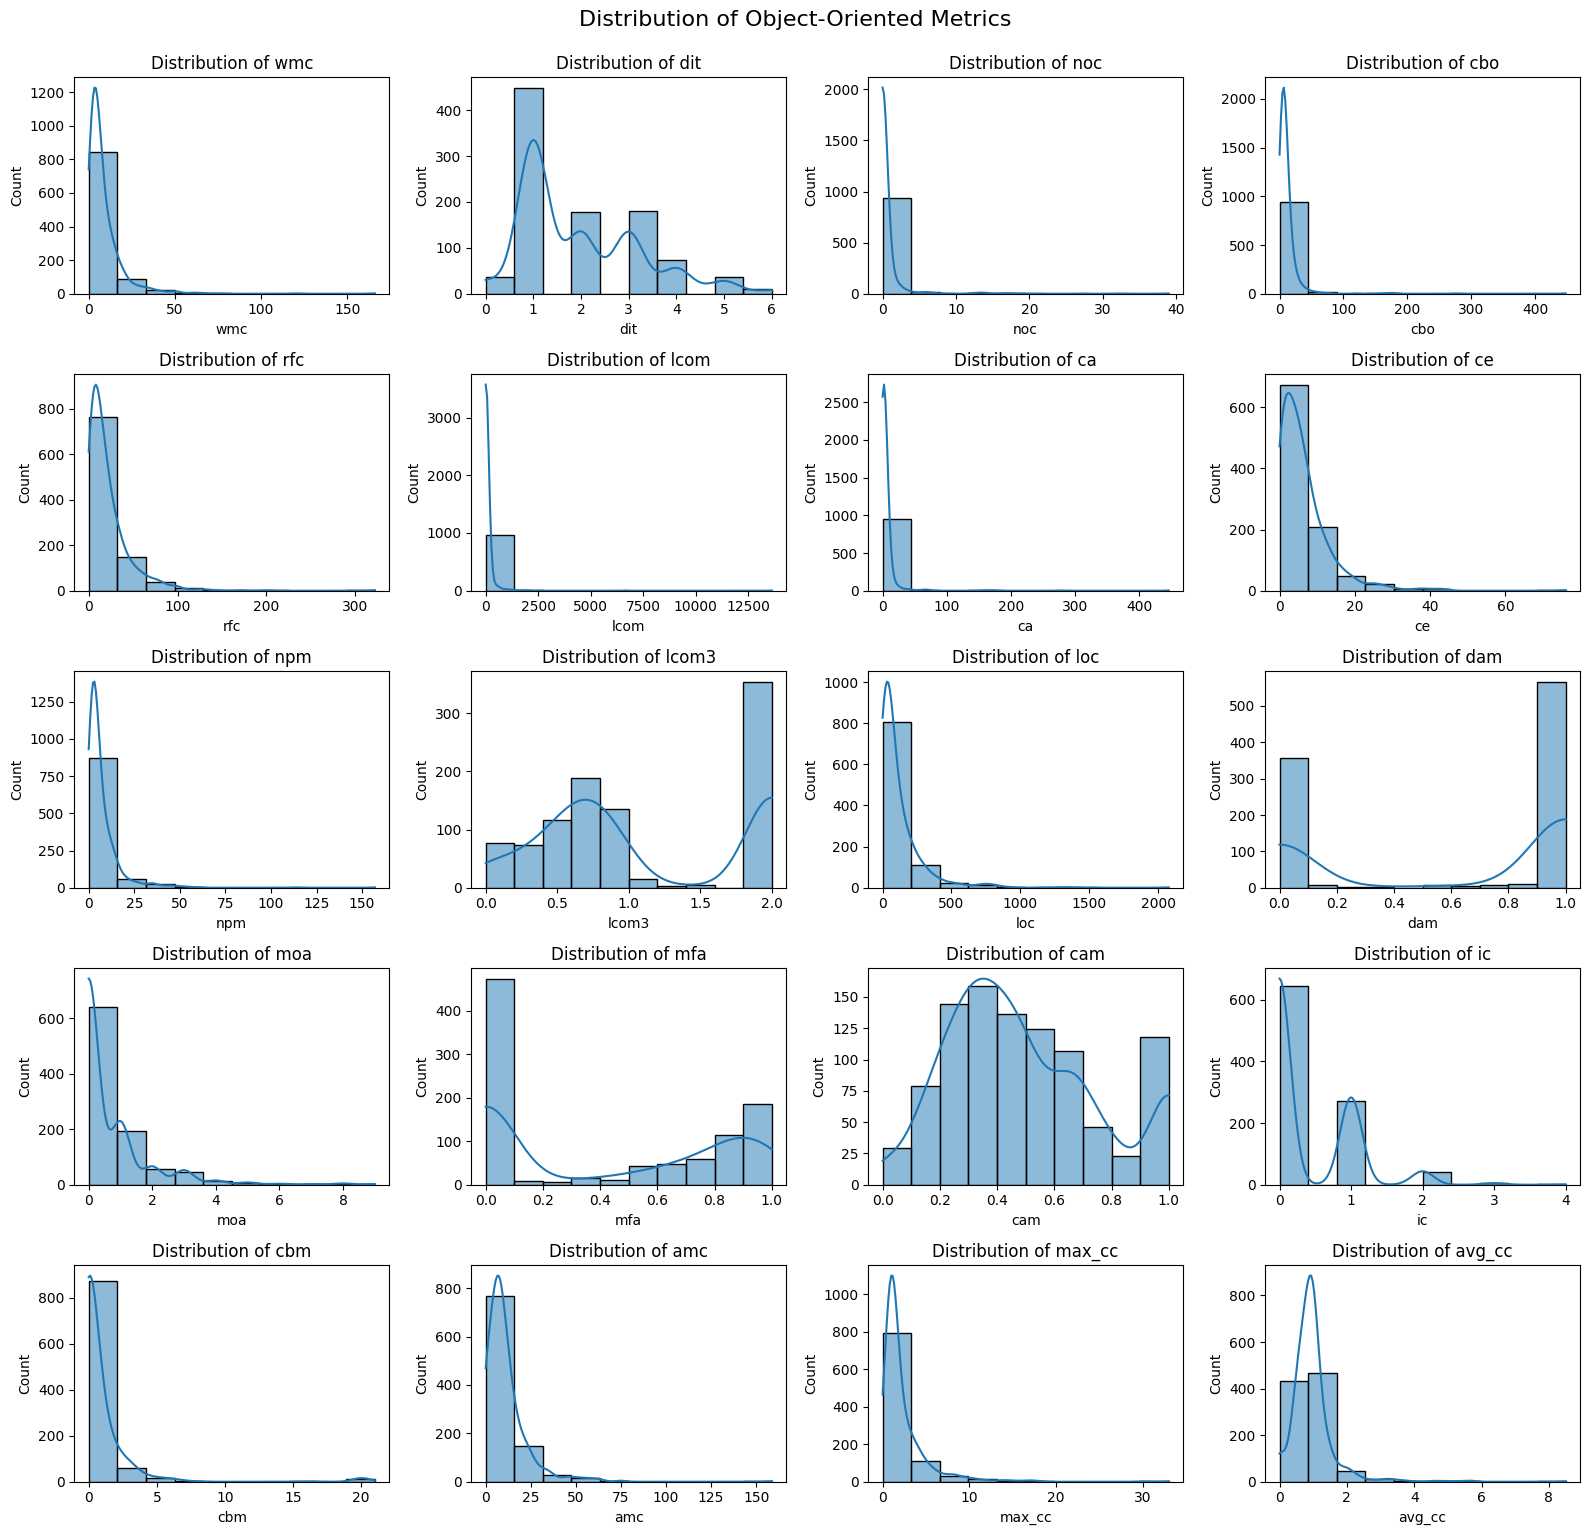

In [20]:
print("\n--- Visualizing Object-Oriented Metrics (Histograms) ---")

num_features_to_plot = min(len(features), 20)
n_cols = 4
n_rows = (num_features_to_plot + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(features[:num_features_to_plot]):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle("Distribution of Object-Oriented Metrics", y=1.02, fontsize=16)
plt.show()


--- Visualizing Object-Oriented Metrics (Box Plots) ---


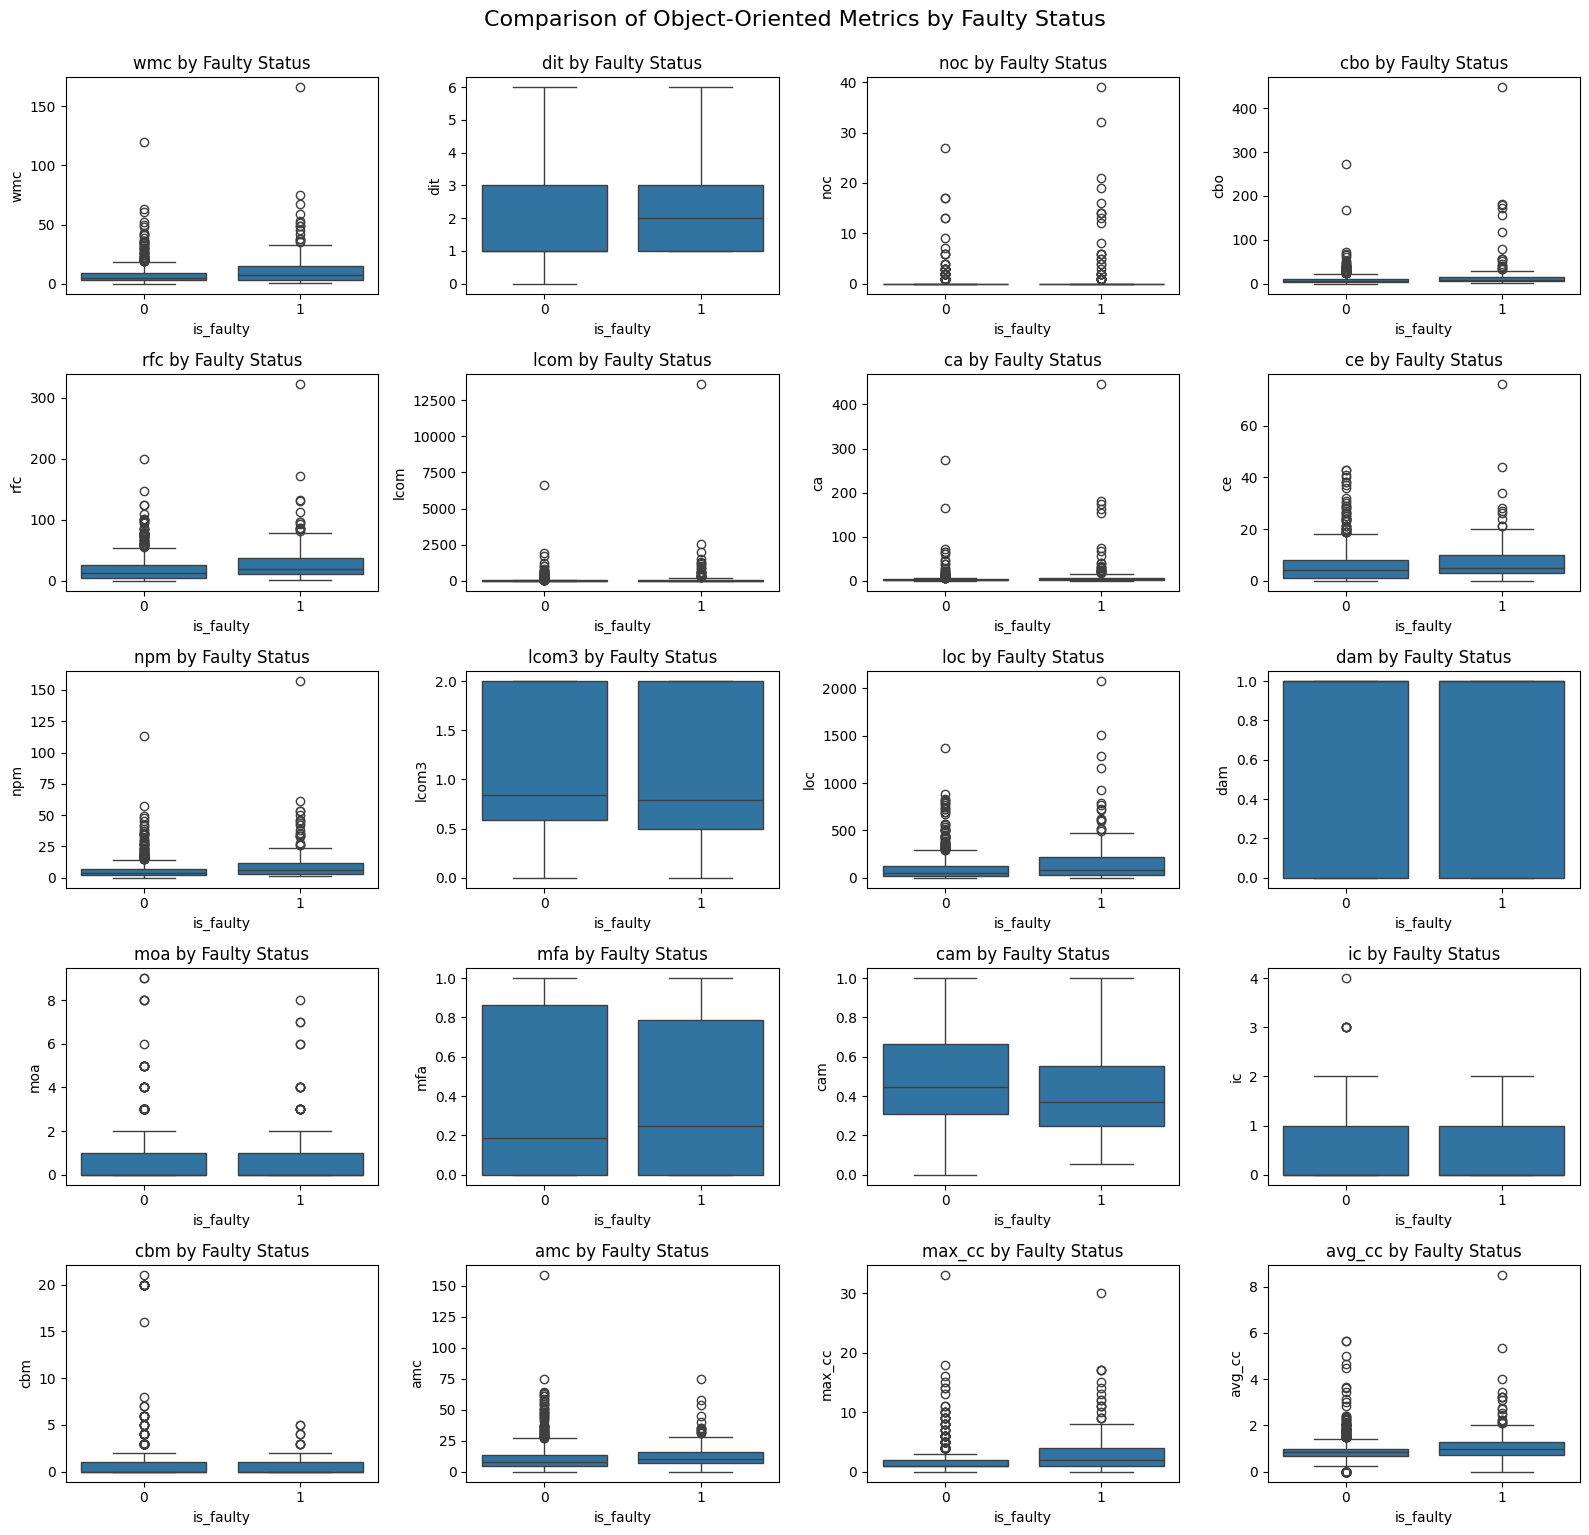

In [21]:
print("\n--- Visualizing Object-Oriented Metrics (Box Plots) ---")

num_features_to_plot = min(len(features), 20)
n_cols = 4
n_rows = (num_features_to_plot + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(features[:num_features_to_plot]):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='is_faulty', y=col, data=df)
    plt.title(f'{col} by Faulty Status')
plt.tight_layout()
plt.suptitle("Comparison of Object-Oriented Metrics by Faulty Status", y=1.02, fontsize=16)
plt.show()


--- Visualizing Object-Oriented Metrics (Correlation Heatmap) ---


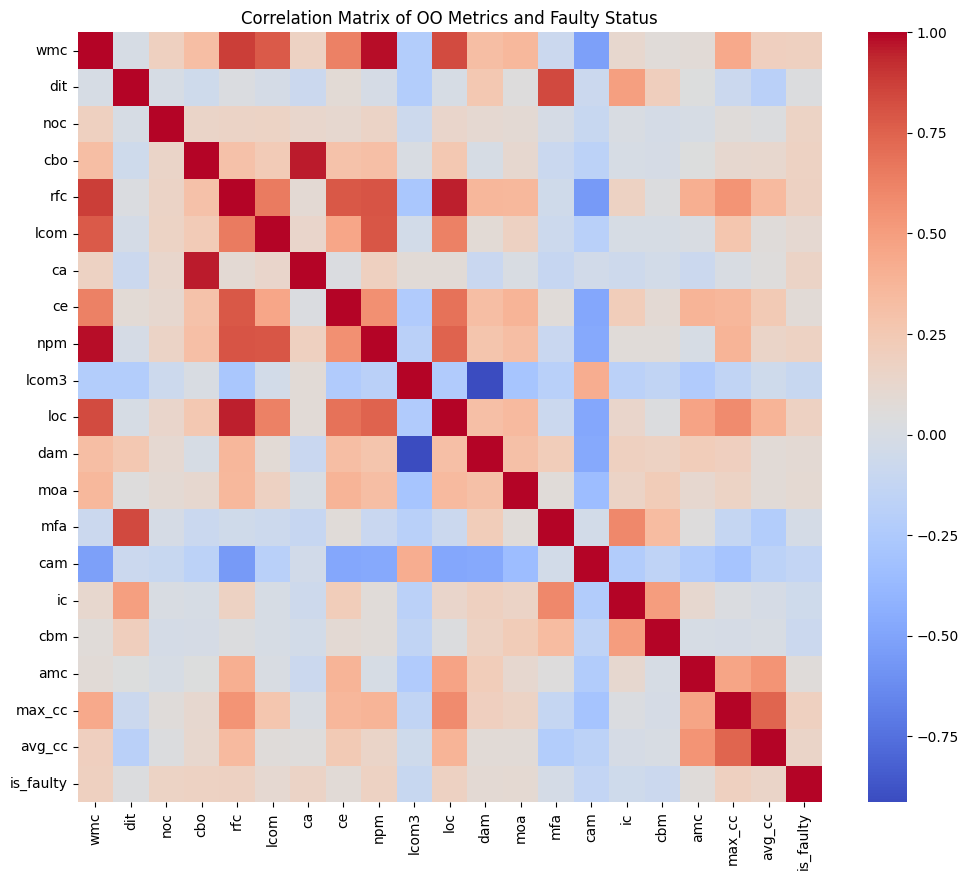

In [22]:
print("\n--- Visualizing Object-Oriented Metrics (Correlation Heatmap) ---")

plt.figure(figsize=(12, 10))
sns.heatmap(df[features + ['is_faulty']].corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of OO Metrics and Faulty Status")
plt.show()

In [23]:
print("\n--- Training Decision Tree Model ---")

# Initialize the Decision Tree Classifier
# Using a max_depth to prevent overfitting and make the tree interpretable.
# The class_weight parameter helps handle class imbalance by giving more weight to the minority class.
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')

# Train the model
dt_classifier.fit(X_train, y_train)

print("Decision Tree Model Trained.")


--- Training Decision Tree Model ---
Decision Tree Model Trained.


In [24]:
import joblib
import os

# Define the directory to save the model
model_dir = 'trained_models'
os.makedirs(model_dir, exist_ok=True) # Create the directory if it doesn't exist

# Define the file path for the model
model_filename = os.path.join(model_dir, 'fault_prediction_decision_tree_model.joblib')

# Save the trained model
joblib.dump(dt_classifier, model_filename)

print(f"Model saved successfully to: {model_filename}")

Model saved successfully to: trained_models\fault_prediction_decision_tree_model.joblib



--- Evaluating Model Performance ---
Accuracy: 0.60

Classification Report:
              precision    recall  f1-score   support

  Not Faulty       0.86      0.60      0.71       234
      Faulty       0.26      0.59      0.36        56

    accuracy                           0.60       290
   macro avg       0.56      0.60      0.54       290
weighted avg       0.74      0.60      0.64       290


Confusion Matrix:
[[141  93]
 [ 23  33]]


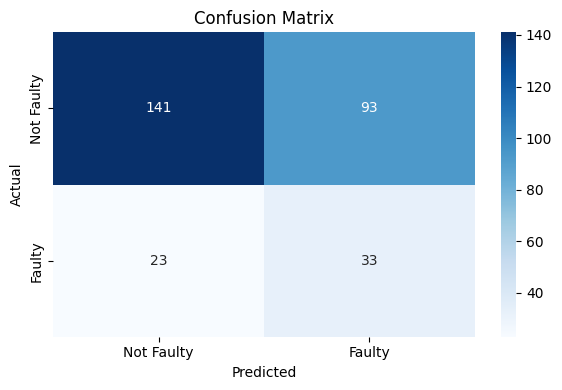

In [25]:
print("\n--- Evaluating Model Performance ---")

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Faulty', 'Faulty']))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Faulty', 'Faulty'], 
            yticklabels=['Not Faulty', 'Faulty'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


--- Visualizing the Decision Tree ---


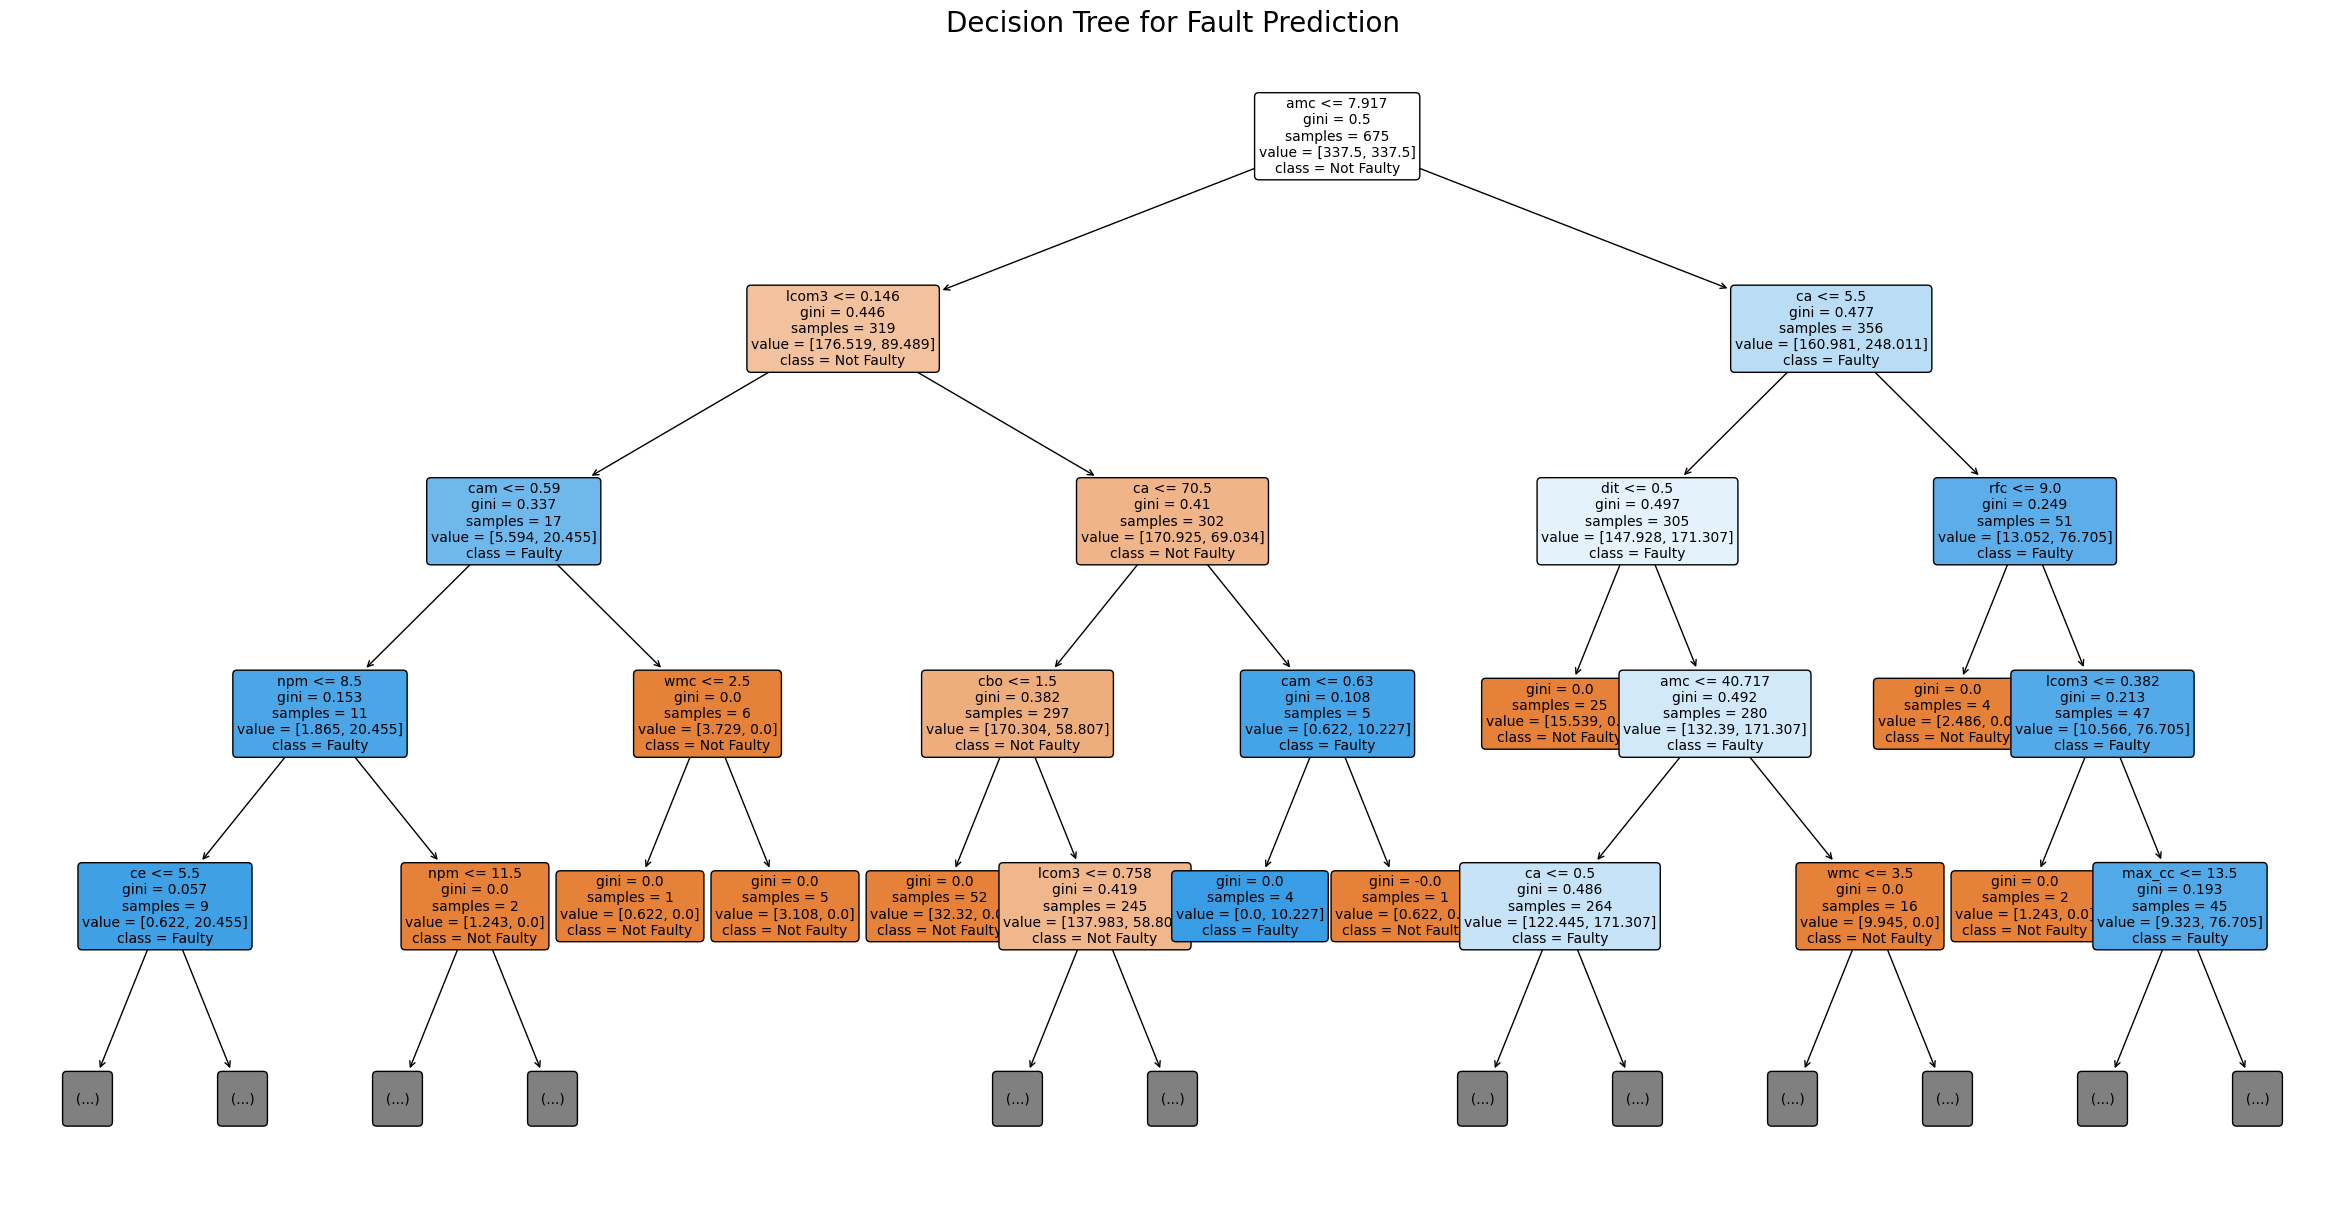

In [26]:
print("\n--- Visualizing the Decision Tree ---")

plt.figure(figsize=(30, 15)) # Increased size for better visibility
plot_tree(dt_classifier,
          feature_names=features,
          class_names=['Not Faulty', 'Faulty'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=4) # Limiting depth for plot readability if the tree is very deep
plt.title("Decision Tree for Fault Prediction", fontsize=20)
plt.show()

In [32]:
import pandas as pd
import joblib
import os

# --- Configuration ---
model_dir = 'trained_models'
model_filename = os.path.join(model_dir, 'fault_prediction_decision_tree_model.joblib')

# Define the same features used during training
# This is crucial: the new data file MUST have these columns
features = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm',
            'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc',
            'max_cc', 'avg_cc']

# --- Load the Trained Model ---
try:
    loaded_model = joblib.load(model_filename)
    print(f"Model loaded successfully from: {model_filename}")
except FileNotFoundError:
    print(f"Error: Model file not found at {model_filename}.")
    print("Please ensure you have run the training script and saved the model.")
    exit() # Exit if the model cannot be loaded
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

Model loaded successfully from: trained_models\fault_prediction_decision_tree_model.joblib


In [33]:


# Define the features used in the training model
features = ['WMC', 'DIT', 'NOC', 'CBO', 'RFC', 'LCOM']  # Update this list as per your actual model

# Load the trained model beforehand
# from joblib import load
# loaded_model = load('decision_tree_model.pkl')

def predict_faults_from_file(file_path='velocity-1.6.csv'):
    """
    Predicts faults using a pre-trained model on the velocity-1.6.csv dataset.

    Args:
        file_path (str): Path to the CSV file (default is 'velocity-1.6.csv').

    Returns:
        pandas.DataFrame: Data with predictions added, or None on failure.
    """
    try:
        # Step 1: Read CSV
        new_data = pd.read_csv(file_path)
        print(f"\n✅ Successfully read data from: {file_path}")
        print("🔍 First 5 rows of data:")
        print(new_data.head())

        # Step 2: Validate required features
        missing_features = [f for f in features if f not in new_data.columns]
        if missing_features:
            print(f"\n❌ Missing required features: {missing_features}")
            return None

        # Step 3: Predict
        X_new = new_data[features]
        predictions = loaded_model.predict(X_new)

        # Step 4: Append prediction results
        new_data['predicted_faulty'] = predictions
        new_data['prediction_label'] = new_data['predicted_faulty'].map({0: 'Not Faulty', 1: 'Faulty'})

        # Step 5: Summary
        print("\n📊 Prediction Summary:")
        print(new_data['prediction_label'].value_counts())

        print("\n✅ Prediction completed successfully.")
        return new_data

    except FileNotFoundError:
        print(f"❌ Error: File not found at {file_path}")
    except pd.errors.EmptyDataError:
        print(f"❌ Error: File '{file_path}' is empty.")
    except Exception as e:
        print(f"❌ An unexpected error occurred: {e}")

    return None
